### Exploratory Data Analysis

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# read data
path = r"C:\Users\user\Desktop\DATA_SCIENCE\HamoyeInternship\StageC_premier\UK_Traffic_Accidents_2015.csv"
df = pd.read_csv(open(path),low_memory= False)
df.head() 

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [5]:
# check data shape
df.shape

(140056, 32)

In [6]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [7]:
# check for any missing values
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [38]:
# visualize the missing data
# make a list of features with nan values
features_nan = [features for features in df.columns if df[features].isnull().sum() > 1]
# print % of missing values in features with nan
for feature in features_nan:
    print(feature,np.round(df[feature].isnull().mean(),4)," % missing values")

Location_Easting_OSGR 0.0002  % missing values
Location_Northing_OSGR 0.0002  % missing values
Longitude 0.0002  % missing values
Latitude 0.0002  % missing values
Time 0.0001  % missing values
LSOA_of_Accident_Location 0.0635  % missing values


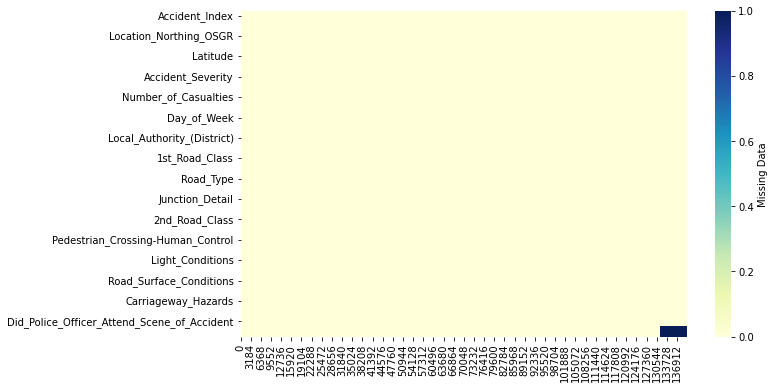

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [39]:
 """"Fill nan values in cident_Index, Location_Easting_OSGR, Location_Northing,
 Latitude and longitude and dropping the LSOA_of_Accident_Location since it contains thousands of missing values
    """ 
for feature in features_nan:
    if feature not in ["Time","LSOA_of_Accident_Location"]:
        median_value = df[feature].median()
        df[feature] = df[feature].fillna(median_value)
        
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [40]:
# Fill missing values in Time with mode
mode_value = df["Time"].mode()[0]
print(mode_value)
df["Time"] = df["Time"].fillna(mode_value)

17:00


In [34]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [41]:
# drop column
# Drop unnecessary columns
df = df.drop("LSOA_of_Accident_Location",axis = 1)
df.isnull().sum().sum()

0

### Analysis of Location_Easting_OSGR and Location_Northing_OSGR     

In [11]:
#select required column for EDA
loc_data = df.loc[:,["Accident_Index", "Location_Easting_OSGR","Location_Northing_OSGR"]]

In [12]:
loc_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR
0,201501BS70001,525130.0,180050.0
1,201501BS70002,526530.0,178560.0
2,201501BS70004,524610.0,181080.0
3,201501BS70005,524420.0,181080.0
4,201501BS70008,524630.0,179040.0


In [13]:
#check the info of the loc_data
loc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Accident_Index          140056 non-null  object 
 1   Location_Easting_OSGR   140029 non-null  float64
 2   Location_Northing_OSGR  140029 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.2+ MB


In [14]:
loc_data.Accident_Index.describe()

count            140056
unique           140056
top       201501BS70001
freq                  1
Name: Accident_Index, dtype: object

comment : The Accident_Index is a string with unique values, therefore, there isn't much EDA plots that can be done with it.

In [15]:
#drop all null values
loc_data.dropna(inplace=True)

### Questions
- What is the relationship between the Eastings and Northings OSGR?
- Is there any correlation between the Eastings and Northings? If yes, what is the nature of the correlation?


In [16]:
loc_data['Location_Easting_OSGR'].describe()

count    140029.000000
mean     446913.896086
std       94893.264196
min       70860.000000
25%      385626.000000
50%      451460.000000
75%      526760.000000
max      655282.000000
Name: Location_Easting_OSGR, dtype: float64

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


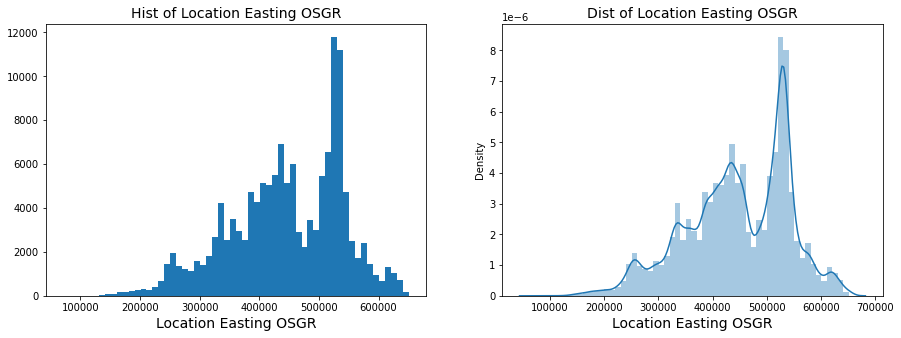

In [97]:
#plt a distplot and histogram of Location Easting
bins= np.arange(loc_data['Location_Easting_OSGR'].min(), loc_data['Location_Easting_OSGR'].max(), 10000)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=loc_data, x='Location_Easting_OSGR', bins=bins);
plt.xlabel('Location Easting OSGR', fontsize=14);
plt.title('Hist of Location Easting OSGR', fontsize=14);

plt.subplot(1,2,2)
sns.distplot(x=loc_data['Location_Easting_OSGR'], bins=bins);
plt.xlabel('Location Easting OSGR', fontsize=14);
plt.title('Dist of Location Easting OSGR', fontsize=14);
plt.savefig("Distribution of Location easting and northing")

Comment:The distribution of the Easting location is Left-skewed, with multi-spikes

In [19]:
loc_data['Location_Northing_OSGR'].describe()

count    1.400290e+05
mean     2.899043e+05
std      1.577932e+05
min      1.062800e+04
25%      1.766380e+05
50%      2.408860e+05
75%      3.911840e+05
max      1.197917e+06
Name: Location_Northing_OSGR, dtype: float64

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


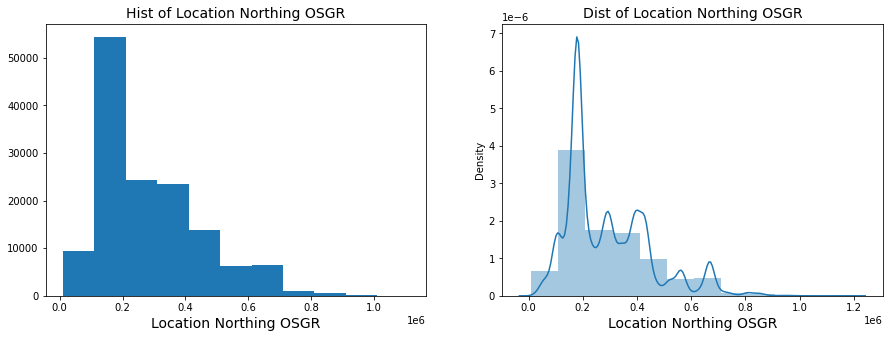

In [20]:
#plt a distplot and histogram of Location Easting
bins= np.arange(1e4, loc_data['Location_Northing_OSGR'].max(), 1e5)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=loc_data, x='Location_Northing_OSGR', bins=bins);
plt.xlabel('Location Northing OSGR', fontsize=14);
plt.title('Hist of Location Northing OSGR', fontsize=14);

plt.subplot(1,2,2)
sns.distplot(x=loc_data['Location_Northing_OSGR'], bins=bins);
plt.xlabel('Location Northing OSGR', fontsize=14);
plt.title('Dist of Location Northing OSGR', fontsize=14);

While the distribution of the Northings is right skewed and unimodal. From this, I can deduce that the relationship between these columns will be negative
### Findings
- They are not a function of each other
- They are not correlative or are correlated negatively.

More findings...

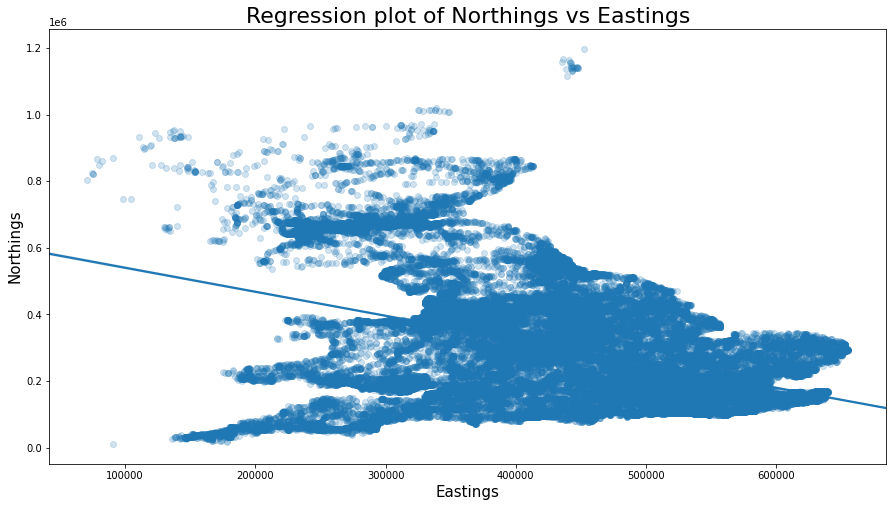

In [24]:
#plot a regplot to get their relationship
plt.figure(figsize=(15,8))
sns.regplot(data=loc_data,x='Location_Easting_OSGR', y='Location_Northing_OSGR', scatter_kws={'alpha':1/5},
          truncate=False, x_jitter=2.5);
plt.title('Regression plot of Northings vs Eastings', fontsize=22);
plt.xlabel('Eastings', fontsize=15);
plt.ylabel('Northings', fontsize=15);


comment :The line shows that there is a negative relationship between the Eastings and Northings

#### Findinds
- Accidents in the UK in Eastings are independent of the Northings
- Further investigation with geo-cordinates will pinpoint further indications about accidents frequencies
- Further look at their unique float values further proves that they are invariably linked.

### Analysis of Categorical Features


In [25]:
# CATEGORICAL FEATURES
cat_features = [f for f in df.columns if df[f].dtype == "object"]
cat_features

['Accident_Index',
 'Date',
 'Time',
 'Local_Authority_(Highway)',
 'LSOA_of_Accident_Location']

In [26]:
# check number of unique values in each categorical features
for f in cat_features:
    print(f,":",len(df[f].unique()))

Accident_Index : 140056
Date : 365
Time : 1440
Local_Authority_(Highway) : 207
LSOA_of_Accident_Location : 28738


In [45]:
# Extract the Month the accident occured from the date
def get_month(col):
    return col.split('/')[1]
    
df["Month"] = df["Date"].apply(lambda x:get_month(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,18,01
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,7,01
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,18,01
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,7,01
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,7,01


In [28]:
# Conver month column to integer
df["Month"] = df["Month"].astype("int")

In [49]:
df["Month"] = df["Month"].astype("object")

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


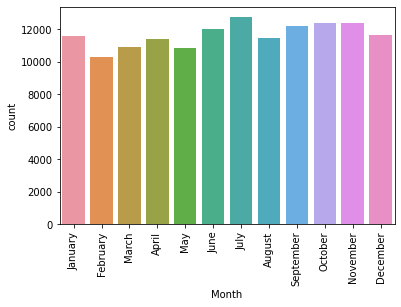

Mean:11671.33   Standard Deviation:731.12


In [53]:
g=sns.countplot(df["Month"])
plt.xticks(rotation = 90)
g.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.show()
print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(df.Month.value_counts().mean(), 
                                                      df.Month.value_counts().std()))

Comment:Highest number of accidents occur in july and the lowest number of accident occur in febraury,the number of accidents towards the end of year are around the same values expecially from september to november

### Extracting the hour the accident occured from the time column

In [43]:
def get_hour(col):
    return str(col).split(':')[0]
    
df["Hour"] = df["Time"].apply(lambda x:get_hour(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,07
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,07
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,07


In [54]:
df["Hour"] = df["Hour"].astype(int)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,18,01
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,7,01
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,18,01
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,7,01
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,7,01


In [55]:
#chage format of time
def change_hour_format(hr):
    if hr <= 12:
        return str(hr)+"am"
    else:
        return str(hr - 12) + "pm"
df["Hour"] = df["Hour"].apply(lambda x:change_hour_format(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,6pm,01
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,7am,01
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,6pm,01
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,7am,01
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,7am,01


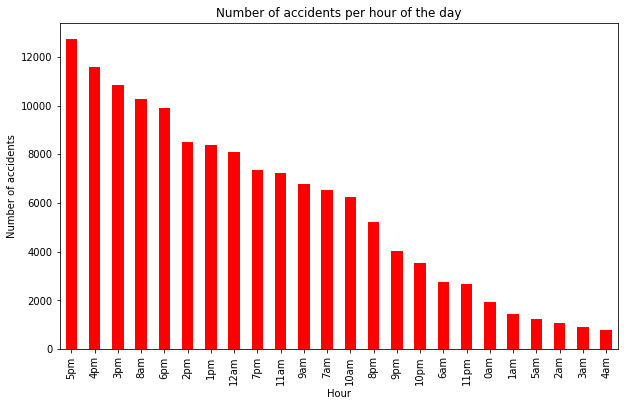

In [63]:
# display top hours with highest case of accidemts
plt.figure(figsize=(10,6))
df.groupby("Hour")["Hour"].count().sort_values(ascending = False).plot.bar(color = "red")
plt.xticks(rotation = 90)
plt.ylabel("Number of accidents")
plt.title("Number of accidents per hour of the day")
plt.savefig("Hour_of_accident_occurence.png")
plt.show()

comment:Most accidents occur around 5pm,4pm,3pm,8pm.....as show on the diagram,This might because there might be a lot of traffic at this time or more people tend to move out around this time but there are obvioulsy a lot of casualities aroung8am,this might because a lot of people tend to go and go their respective work places which in turn returns into road traffic

#### Numerical Features

In [64]:
num_features = [f for f in df.columns if df[f].dtype == "int64" or df[f].dtype == "int32" or df[f].dtype == "float"]
num_features

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

In [65]:
for f in num_features:
    print(f,":",len(df[f].unique()))

Location_Easting_OSGR : 89880
Location_Northing_OSGR : 93322
Longitude : 133316
Latitude : 131977
Police_Force : 51
Accident_Severity : 3
Number_of_Vehicles : 16
Number_of_Casualties : 22
Day_of_Week : 7
Local_Authority_(District) : 380
1st_Road_Class : 6
1st_Road_Number : 4340
Road_Type : 6
Speed_limit : 8
Junction_Detail : 10
Junction_Control : 5
2nd_Road_Class : 7
2nd_Road_Number : 3795
Pedestrian_Crossing-Human_Control : 4
Pedestrian_Crossing-Physical_Facilities : 7
Light_Conditions : 5
Weather_Conditions : 9
Road_Surface_Conditions : 6
Special_Conditions_at_Site : 9
Carriageway_Hazards : 7
Urban_or_Rural_Area : 2
Did_Police_Officer_Attend_Scene_of_Accident : 4


In [66]:
# Select features with 25 or lower number of unique values, they will be refered to as discrete numerical features
discrete_num = [f for f in num_features if len(df[f].unique()) <= 25]
discrete_num

['Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 '1st_Road_Class',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

### Study the Severity of the study

In [67]:
# Change to real meaning of the integer values
labels  = {"Accident_Severity":{1:"fatal",2:"serious",3:"slight"}}
df = df.replace(labels)
df["Accident_Severity"].head()  

0     slight
1     slight
2     slight
3     slight
4    serious
Name: Accident_Severity, dtype: object

In [68]:
df["Accident_Severity"].value_counts()

slight     118402
serious     20038
fatal        1616
Name: Accident_Severity, dtype: int64

In [69]:
lst = list(df["Accident_Severity"].value_counts())

<Figure size 720x504 with 0 Axes>

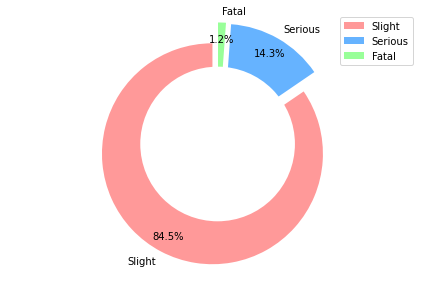

In [86]:
values = np.array(lst)
plt.figure(figsize=(10.,7))
labels = ["Slight","Serious","Fatal"]
sizes = [85.54,14.31,1.15]
colors = ["#ff9999","#66b3ff","#99ff99"]
explode = (0.1,0.1,0.1)
fig1,ax1 = plt.subplots()
ax1.pie(values,colors = colors,labels = labels,autopct = "%1.1f%%",startangle=90,explode=explode,pctdistance=0.85)
# draw curcle
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.pie(values,labels=labels,autopct='%1.2f%%')
ax1.axis("equal")
plt.tight_layout()
plt.legend()
plt.savefig("Target_classes.png")
plt.show()

Comment: It is an inbalanced class with slight accidents having the highest occurence

### 1st Road Type

In [88]:
df["1st_Road_Class"].unique()

array([5, 6, 4, 3, 1, 2], dtype=int64)

In [89]:
labels = {"1st_Road_Class":{1:"Motorway",2:"A(M)",3:"A",4:"B",5:"C",6:"Unclassified"}}

In [90]:
df = df.replace(labels)

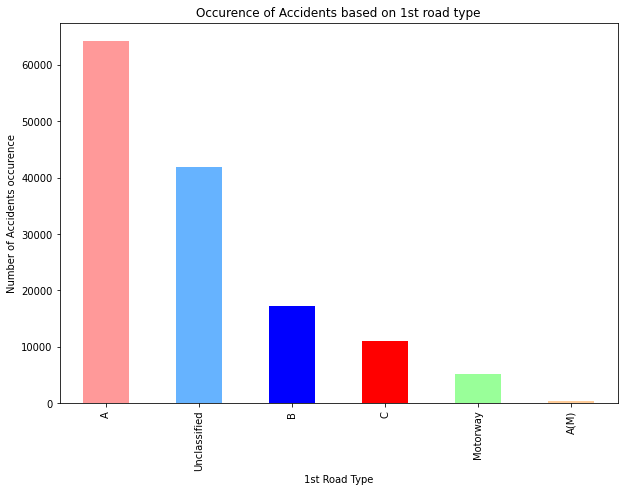

In [96]:
df_1st_road = df.loc[:,["1st_Road_Class","Accident_Severity"]]
plt.figure(figsize=(10,7))
df_1st_road["1st_Road_Class"].value_counts().plot.bar(color = ['#ff9999','#66b3ff','b','r','#99ff99','#ffcc99'])
plt.xlabel("1st Road Type")
plt.ylabel("Number of Accidents occurence")
plt.title("Occurence of Accidents based on 1st road type")
plt.savefig("1st_road_type.png")
plt.show()

### Ploting the longitude and latitude to know the concentration of accidents occurence


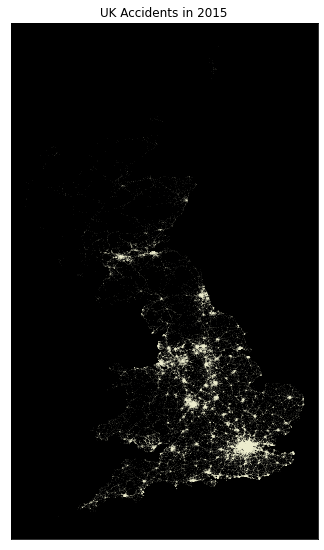

In [98]:
# Lets get to know where most of the accidents must have occured
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = df["Longitude"], y = df["Latitude"],s=0.005, alpha= 0.25, color="lightyellow")
plt.title("UK Accidents in 2015")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

### Analysing lighting conditions and pedestrial crossing-physical 

In [99]:
!pip install squarify

In [102]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour', 'Month'],
      dtype='object')

In [104]:
df["Pedestrian_Crossing-Human_Control"].unique()

array([ 0,  1,  2, -1], dtype=int64)

In [106]:
df["Pedestrian_Crossing-Physical_Facilities"].unique()

array([ 0,  1,  5,  4,  8,  7, -1], dtype=int64)

In [108]:
df["Light_Conditions"].unique()

array([4, 1, 6, 7, 5], dtype=int64)

### What lighting conditions results in the least and highest number of accidents?

In [110]:
df_light = df.groupby(['Light_Conditions'])['Accident_Index'].count().sort_values(ascending=False)
df_light = df_light.reset_index()

In [111]:
df_light.rename({'Accident_Index':'Accident_count', 'Light_Conditions':'light_conditions_code'}, axis= 1, inplace= True)
df_light

,light_conditions_code,Accident_count
0,1,102608
1,4,27551
2,6,7258
3,7,1920
4,5,719


In [115]:
light_map = {'light_conditions_code':[1,4,5,6,7],
             'Light_condition':['Daylight' ,'Darkness: streetlight present & lit', 'Darkness: streetlight present but not lit','Darkness: No streetlight', 'Darkness: streetlighting unknow']}
light = pd.DataFrame(light_map)
light

,light_conditions_code,Light_condition
0,1,Daylight
1,4,Darkness: streetlight present & lit
2,5,Darkness: streetlight present but not lit
3,6,Darkness: No streetlight
4,7,Darkness: streetlighting unknow


In [116]:
df_light = pd.merge(df_light, light, on= 'light_conditions_code', how = 'outer')
df_light

,light_conditions_code,Accident_count,Light_condition
0,1,102608,Daylight
1,4,27551,Darkness: streetlight present & lit
2,6,7258,Darkness: No streetlight
3,7,1920,Darkness: streetlighting unknow
4,5,719,Darkness: streetlight present but not lit


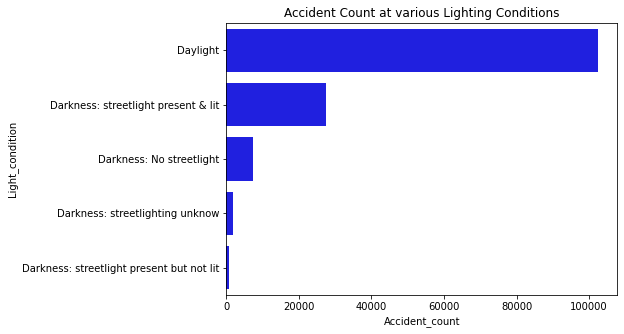

In [120]:
plt.figure(figsize=(7,5))
sns.barplot(data = df_light, y = 'Light_condition', x = 'Accident_count', color= 'b').set(title = 'Accident Count at various Lighting Conditions')
plt.savefig("Light_conditions.png")

Comment : The chart show that most accident occurs during the daylight which is the best lighting condition. This maybe due to the fact that most driving activities are within the daytime. Furthermore, lighting condition seems to give very little or explanation as to the cause for accident as more of the accidents occured during the best light conditions and fewer accidents during the worst lighting conditions.

### Does lighting condition affects accident severity?

In [151]:
li_sev_df = df.groupby(['Light_Conditions', 'Accident_Severity'])['Accident_Index'].count()
li_sev_df = li_sev_df.reset_index()
li_sev_df

,Light_Conditions,Accident_Severity,Accident_Index
0,1,fatal,968
1,1,serious,14017
2,1,slight,87623
3,4,fatal,290
4,4,serious,4086
5,4,slight,23175
6,5,fatal,15
7,5,serious,137
8,5,slight,567
9,6,fatal,308


In [152]:
li_sev_df.rename({'Accident_Index':'Accident_count', 'Light_conditions':'light_conditions_code', 'Accident_Severity':'severity_code'}, axis= 1,inplace=True)
li_sev_df


,Light_Conditions,severity_code,Accident_count
0,1,fatal,968
1,1,serious,14017
2,1,slight,87623
3,4,fatal,290
4,4,serious,4086
5,4,slight,23175
6,5,fatal,15
7,5,serious,137
8,5,slight,567
9,6,fatal,308


In [154]:
li_sev_df["severity_code"] = li_sev_df["severity_code"].apply(lambda x:1 if x == "fatal" else (2 if x == "serious" else 3))

In [160]:
li_sev_df["light_conditions_code"] = li_sev_df["Light_Conditions"]

In [163]:
li_sev_df = li_sev_df.drop(columns=['Light_Conditions','accident_severity'],axis = 1)

In [164]:
severity_map = {'severity_code':[1,2,3],
             'accident_severity':['fatal' ,'serious', 'slight']}
severity = pd.DataFrame(severity_map)
severity

,severity_code,accident_severity
0,1,fatal
1,2,serious
2,3,slight


In [165]:
li_sev_df = pd.merge(li_sev_df, severity, on= 'severity_code', how = 'outer')
li_sev_df = pd.merge(li_sev_df, light, on= 'light_conditions_code', how = 'outer')
li_sev_df

,severity_code,Accident_count,light_conditions_code,accident_severity,Light_condition
0,1,968,1,fatal,Daylight
1,2,14017,1,serious,Daylight
2,3,87623,1,slight,Daylight
3,1,290,4,fatal,Darkness: streetlight present & lit
4,2,4086,4,serious,Darkness: streetlight present & lit
5,3,23175,4,slight,Darkness: streetlight present & lit
6,1,15,5,fatal,Darkness: streetlight present but not lit
7,2,137,5,serious,Darkness: streetlight present but not lit
8,3,567,5,slight,Darkness: streetlight present but not lit
9,1,308,6,fatal,Darkness: No streetlight


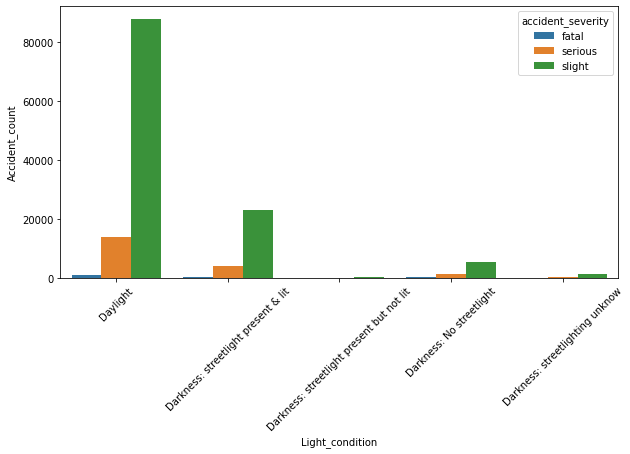

In [172]:
plt.figure(figsize=(10, 5))
sns.barplot(data = li_sev_df, x= 'Light_condition', y = 'Accident_count', hue = 'accident_severity')
plt.xticks(rotation=45)
plt.savefig("Accident distribution across lighting conditions.png")

Comment : Accident severity have similar distribution accross the different lighting conditions. Most accidents are slight while fatal accidents have the lowest recorded number irrespective of the lighting condition.

### Does the presence of a pedestrial crossing-human control reduce accident occurence?

In [186]:
ped_hc_df = df.groupby('Pedestrian_Crossing-Human_Control')['Accident_Index'].count().sort_values(ascending = False)
ped_hc_df = ped_hc_df.reset_index()
ped_hc_df.rename({'Accident_Index':'accident_count', 'Pedestrian_Crossing-Human_Control':'hc_code'}, axis= 1, inplace= True)
ped_hc_df

,hc_code,accident_count
0,0,139201
1,2,433
2,1,282
3,-1,140


In [187]:
hc_map = {'hc_code':[0,1,2,-1],
             'pedestrian_crossing_human_control':['None within 50metres' ,'Control by schoool patrol', 'Control other authorised person', 'Data missing or out of range']}
hc = pd.DataFrame(hc_map)
hc

,hc_code,pedestrian_crossing_human_control
0,0,None within 50metres
1,1,Control by schoool patrol
2,2,Control other authorised person
3,-1,Data missing or out of range


In [189]:
ped_hc_df = pd.merge(ped_hc_df, hc, on = 'hc_code', how = 'outer')
ped_hc_df

,hc_code,accident_count,pedestrian_crossing_human_control
0,0,139201,None within 50metres
1,2,433,Control other authorised person
2,1,282,Control by schoool patrol
3,-1,140,Data missing or out of range


[Text(0.5, 1.0, 'Accident Count for Various Pedestrian crosing Human control')]

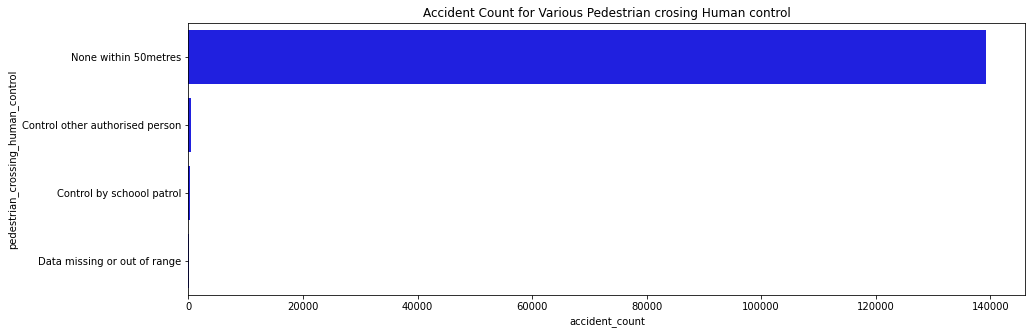

In [191]:
plt.figure(figsize=(15,5))
sns.barplot(data = ped_hc_df, y = 'pedestrian_crossing_human_control', x = 'accident_count', color= 'b').set(title = 'Accident Count for Various Pedestrian crosing Human control')

Comment : Majority of recorded accidents occurred with no pedestrian crossing human control within 50 metres. Accidents that occurred for other conditions are minimal.